In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
iris = pd.read_csv("iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values


In [5]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [7]:
iris_outcome = pd.crosstab(index=iris["variety"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
variety,
Setosa,50
Versicolor,50
Virginica,50


In [8]:
iris_setosa=iris.loc[iris["variety"]=="setosa"]
iris_virginica=iris.loc[iris["variety"]=="virginica"]
iris_versicolor=iris.loc[iris["variety"]=="versicolor"]

/Users/venu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


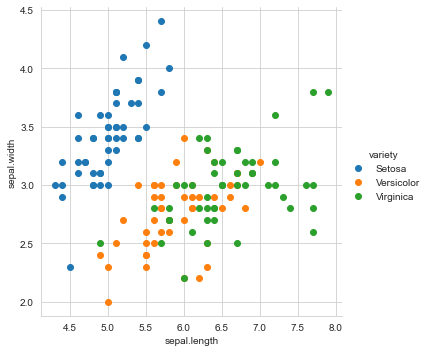

In [22]:
sns.FacetGrid(iris, hue="variety", size=5) \
.map(plt.scatter, "sepal.length", "sepal.width") \
.add_legend()
plt.show()

/Users/venu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


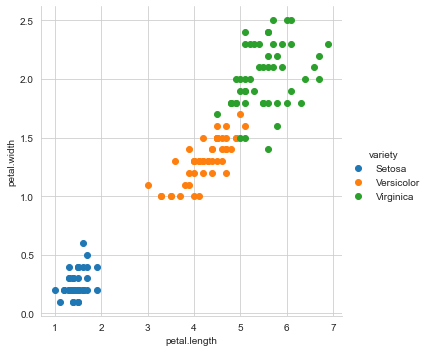

In [23]:
sns.FacetGrid(iris, hue="variety", size=5) \
.map(plt.scatter, "petal.length", "petal.width") \
.add_legend()
plt.show()

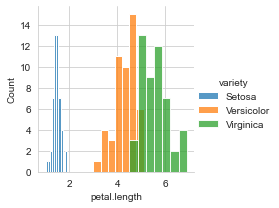

In [26]:

sns.FacetGrid(iris,hue="variety",height=3).map(sns.histplot,"petal.length").add_legend()
plt.show()

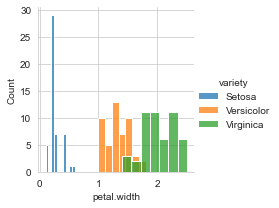

In [28]:
sns.FacetGrid(iris,hue="variety",height=3).map(sns.histplot,"petal.width").add_legend()
plt.show()

In [29]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


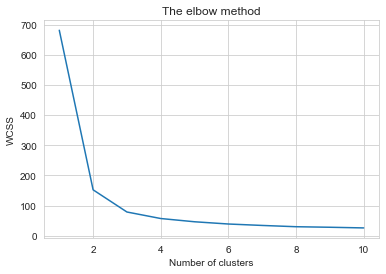

In [30]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [31]:
iris['variety'] = pd.Categorical(iris["variety"])
iris["variety"] = iris["variety"].cat.codes

In [33]:
x = iris.values[:, 1:5]
y = iris.values[:, 4]

In [36]:
x.shape
y.shape

(150,)

In [37]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(x)
# Getting the cluster labels
labels = kmeans.predict(x)
# Centroid values
centroids = kmeans.cluster_centers_

In [38]:
centroids

array([[2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [3.428     , 1.462     , 0.246     , 0.        ],
       [2.98367347, 5.57346939, 2.03265306, 2.        ]])

In [41]:
from sklearn.metrics import classification_report

target_names = ['setosa', 'versicolor', 'virginica']

print(classification_report(iris['variety'],kmeans.labels_,target_names=target_names))

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        50
  versicolor       0.00      0.00      0.00        50
   virginica       1.00      0.98      0.99        50

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150



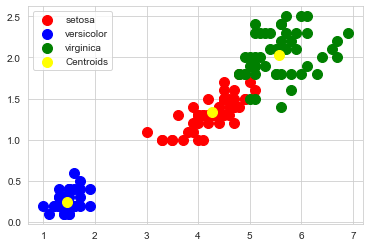

In [43]:
plt.scatter(x[labels == 0, 1], x[labels == 0, 2], s = 100, c = 'red', label = 'setosa')
plt.scatter(x[labels == 1, 1], x[labels == 1, 2], s = 100, c = 'blue', label = 'versicolor')
plt.scatter(x[labels == 2, 1], x[labels == 2, 2], s = 100, c = 'green', label = 'virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100,c='yellow', label = 'Centroids')
plt.legend()

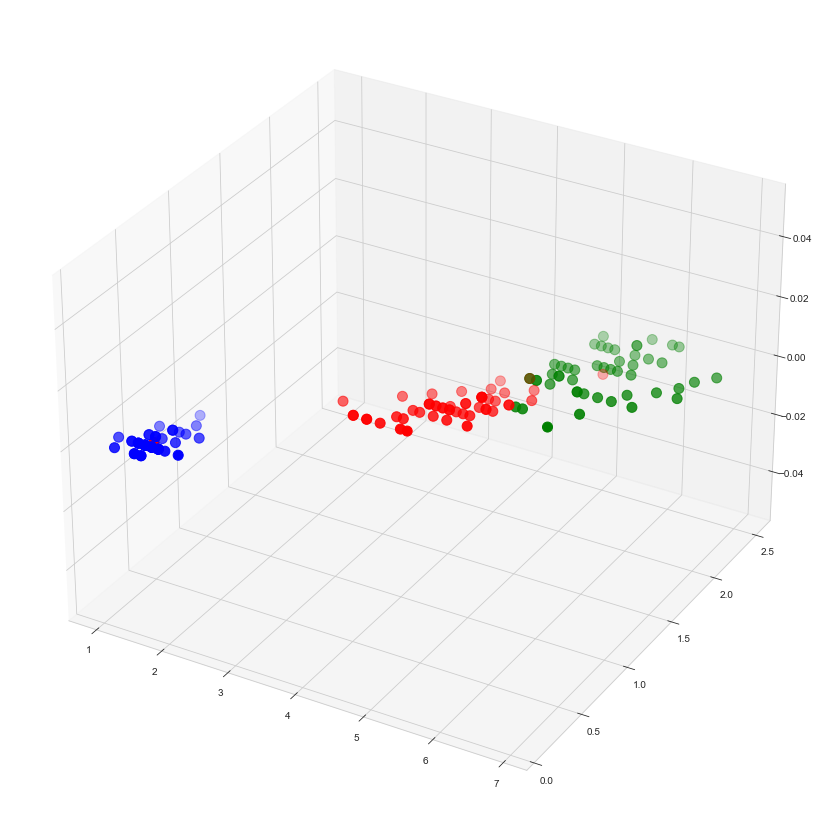

In [46]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[labels == 0, 1], x[labels == 0, 2], s = 100, c = 'red', label = 'setosa')
plt.scatter(x[labels == 1, 1], x[labels == 1, 2], s = 100, c = 'blue', label = 'versicolor')
plt.scatter(x[labels == 2, 1], x[labels == 2, 2], s = 100, c = 'green', label = 'virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1,] ,kmeans.cluster_centers_[:,2], s = 100, c = 'red', label = 'Centroids')
plt.show()


In [47]:
test_sample = iris.sample()
test_sample

,sepal.length,sepal.width,petal.length,petal.width,variety
103,6.3,2.9,5.6,1.8,2


In [48]:
X_data = test_sample.values[:,[1,2,3,4]]
y_label= test_sample.values[:,4]

In [49]:
X_data,y_label[0]

(array([[2.9, 5.6, 1.8, 2. ]]), 2.0)

In [50]:
y_pred =kmeans.predict(X_data)
y_pred[0]

2

In [52]:
print("Classified as : ")
print()
if y_pred[0]==0:
    print("setosa")
elif y_pred[0]==1:
    print("versicolor")
elif y_pred[0]==2:
    print("virginica")

Classified as : 

virginica
